# Zomato Reviews: Analyzing the Relationship between Price, Cuisine, and Rating Factors

### Authors: Blaise (Michael) Mongiardo, Sisi Shao, Kenneth Yu
### Emails: mbm485@stern.nyu.edu, ss9270@stern.nyu.edu, kly237@stern.nyu.edu

#### Background & Introduction
Founded in 2008, Zomato is a restaurant search service based in India. Much like Yelp, the company seeks to provide users with restaurant information like cuisine and general price and to allow them to leave reviews. Zomato operates in 24 countries and thus has global footprint.

We were interested in seeing the relationship specifically between a restaurant's price and cuisine and its rating. Certain cuisines tend to be considered "high-end" and therefore command a higher price point for a meal. Moreover, because price tends to signal quality, especially in the restaurant industry, the food and service should be relatively better. 

Through analysis of Zomato data, we hope to test two hypotheses as follows: restaurants with cuisines that connotate fine dining (specifically French and Japanese) will have a higher price point and thus rating, and restaurants with a higher price will have higher ratings left by reviewers.

#### Data
The data we will use comes from Kaggle (https://www.kaggle.com/shrutimehta/zomato-restaurants-data). The two data sets that will be utilized from this source are the main zomato.csv file and the country-code.xlsx file.

The author of these data sets mentions that the main file is "Analyzing the best restaurants of the major cities". 

#### Data Set at a Glance
Here, we begin to run our code.

In [1]:
import pandas as pd #analyze data
import matplotlib.pyplot as plt #visualize data
import numpy as np #facilitate mathematical operations

path = 'https://github.com/kenneth-yu19/Data_Bootcamp_Final_Project/blob/master/zomato.xlsx?raw=true'
exc_data = pd.read_excel(path) #read the excel data from source

zom = pd.DataFrame(exc_data) #convert excel data into pandas dataframe
zom

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [2]:
zom.shape

(9551, 21)

Here, we see that our DataFrame has 21 columns and 9551 rows. This means that the original data set analyzes 9,551 restaurants based on 21 different qualities. Looking through the columns, we see that not all of them are necessary for our data analysis to test our various hypotheses, so we would like to remove a few to clean up our DataFrame.

#### Cleaning Data

In [3]:
zom = zom.drop(columns=['Address','Locality','Locality Verbose','Longitude','Latitude','Has Table booking','Has Online delivery','Is delivering now','Switch to order menu'])
#removing unnecessary columns from df

zom

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,Chinese,1000,Botswana Pula(P),3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Asian, European",2000,Botswana Pula(P),4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"European, Asian, Indian",6000,Botswana Pula(P),4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,Filipino,1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,532


We have now removed unnecessary columns from our DataFrame. Details like specific geographical aspects will not help in our hypothesis testing.

Now, looking closer at the contents of our DataFrame, we see that a few of the "Aggregate rating" entries actually contain "0.0", which essentially equates to a null value; this will not help us in our data analysis, so we will remove the restaurants with this value. Though first, we will try to see why these restaurants receive the "0.0" rating. We assume that the number of votes may not be sufficient, so we will sort the DataFrame by the last column in ascending order.

In [4]:
zom.sort_values(by=['Votes'], ascending=True)

,Restaurant ID,Restaurant Name,Country Code,City,Cuisines,Average Cost for two,Currency,Price range,Aggregate rating,Rating color,Rating text,Votes
5799,18460302,Khalsa Eating Point,1,New Delhi,North Indian,300,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7411,18431145,Radha Swami Chaat Bhandar,1,New Delhi,Street Food,100,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7414,18430905,Ram Ram Ji Kachori Bhandar,1,New Delhi,Street Food,50,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7415,18430907,Rana's Food Corner,1,New Delhi,North Indian,200,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7416,18451597,Sanjay Chicken Shop,1,New Delhi,"Raw Meats, Fast Food",350,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7418,18492057,Shree Raja Ram,1,New Delhi,Fast Food,50,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7420,18429149,Special Moradabadi Chicken Corner,1,New Delhi,Biryani,200,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7422,305567,Sushil Punjabi Vaishno Dhaba,1,New Delhi,North Indian,150,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7423,18455551,Variety of Shawarmas,1,New Delhi,Fast Food,150,Indian Rupees(Rs.),1,0.0,White,Not rated,0
7410,18492103,New Sindhi Chicken Corner,1,New Delhi,"North Indian, Mughlai",500,Indian Rupees(Rs.),2,0.0,White,Not rated,0


From sorting the data, we draw three conclusions: a restaurant gets a null rating if the "Rating text" is "Not rated", the "Rating color" is "White", and if the number of "Votes" is less than "4". We now have to decide which of the columns to use as the parameter for removing the null-value rows. We choose the "Rating color" "White" designation, as it will be simplest to remove rows based on this value. 

However, before we do this, we must now replace all spaces DataFrame's column headers with underscores. We will rename some columns completely to shorten the header.

In [5]:
zom = zom.rename(index=str, columns={"Restaurant ID": "ID","Restaurant Name": "Name","Country Code": "Country_Code","Average Cost for two": "Cost","Price range": "Price","Aggregate rating": "Rating","Rating color": "Color","Rating text": "Text"})
#renaming columns

zom = zom[zom.Color != 'White'] #utilizing boolean indexing to remove rows with "White" as the "Color"

zom

,ID,Name,Country_Code,City,Cuisines,Cost,Currency,Price,Rating,Color,Text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"French, Japanese, Desserts",1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,Japanese,1200,Botswana Pula(P),3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Japanese, Sushi",1500,Botswana Pula(P),4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Japanese, Korean",1500,Botswana Pula(P),4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,Chinese,1000,Botswana Pula(P),3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Asian, European",2000,Botswana Pula(P),4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"European, Asian, Indian",6000,Botswana Pula(P),4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,Filipino,1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,532


We have now removed the null vales for ratings. 

We would now like to clean the data a little bit more. In terms of geography, we have "City" and "Country_Code". Our analysis doesn't need to be so granular to look at a restaurant's city, but we also can't directly tell the restaurant's country location by the "Country_Code" alone. Luckily, the Kaggle user from whom we got the data included an Excel workbook that shows what country pertains to each "Country_Code". We must thus import this new workbook as a dataframe and perform a sort of VLOOKUP -> replace into our original 'zom' DataFrame. The replacing part seems a little complicated, so we opted to use a merge/join operation then manually delete the "Country_Code" column.

In [6]:
path2 = 'https://github.com/kenneth-yu19/Data_Bootcamp_Final_Project/blob/master/country_code.xlsx?raw=true'
exc_data2 = pd.read_excel(path2)
concode = pd.DataFrame(exc_data2) #convert excel data into pandas dataframe
concode = concode.rename(index=str, columns={"Country Code": "Country_Code"}) #renaming column for easier analysis
concode

,Country_Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [7]:
zom = zom.merge(concode, on='Country_Code', how='left') #left merge using "Country_Code" as joining column
zom = zom.drop(columns=['Country_Code','City']) #dropping unnecessary columns
zom = zom[['ID','Name','Country','Cuisines','Cost','Currency','Price','Rating','Color','Text','Votes']] #re-ordering columns
zom

,ID,Name,Country,Cuisines,Cost,Currency,Price,Rating,Color,Text,Votes
0,6317637,Le Petit Souffle,Phillipines,"French, Japanese, Desserts",1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Japanese,1200,Botswana Pula(P),3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,"Japanese, Sushi",1500,Botswana Pula(P),4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,"Japanese, Korean",1500,Botswana Pula(P),4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,Phillipines,Chinese,1000,Botswana Pula(P),3,4.4,Green,Very Good,336
6,6300781,Buffet 101,Phillipines,"Asian, European",2000,Botswana Pula(P),4,4.0,Green,Very Good,520
7,6301290,Vikings,Phillipines,"Seafood, Filipino, Asian, European",2000,Botswana Pula(P),4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,Phillipines,"European, Asian, Indian",6000,Botswana Pula(P),4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,Phillipines,Filipino,1100,Botswana Pula(P),3,4.8,Dark Green,Excellent,532


Above we remove the "Country_Code" and "City" columns and move over the "Country" column so that it's the third column.

Now, there is another column we need to address in our data cleaning: "Currency". We want to normalize the currency, or at least get a relative measure of priciness of a restaurant, as price is a factor in some of our hypotheses, and we think it would be useful to know the extent of priciness for restaurants. Luckily, we have a price rating in the "Price" column and a few restaurants in the U.S. We will eventually remove the "Currency" column, but we would first like to see what exactly are the prices for each of the price ratings (1 to 5). Thus, we create a new DataFrame 'uszom' to anaylze.

In [8]:
uszom = zom.loc[zom['Country'] == 'United States'] #finding restaurants with "Country" value as "United States"
print(uszom.shape)

(431, 11)


We have 431 U.S. restaurants, which provides a pretty good sample for analyzing prices. However, some of the values in the "Cost" column are "0", which isn't helpful, so we will remove those rows.

In [9]:
uszom = uszom[uszom.Cost != 0] #utilizing boolean indexing to remove rows with "0" as the "Cost"
uszom

,ID,Name,Country,Cuisines,Cost,Currency,Price,Rating,Color,Text,Votes
77,17284404,Austin's BBQ and Oyster Bar,United States,"BBQ, Burger, Seafood",25,Dollar($),2,3.3,Orange,Average,35
78,17284203,BJ's Country Buffet,United States,"American, BBQ",10,Dollar($),1,3.3,Orange,Average,25
81,17284397,Elements Coffee Co - Northwest,United States,"Coffee and Tea, Sandwich",10,Dollar($),1,3.4,Orange,Average,26
83,17284094,Chick-fil-A,United States,Fast Food,10,Dollar($),1,3.5,Yellow,Good,67
84,17284409,Guang Zhou Chinese Restaurant,United States,"Asian, Chinese, Vegetarian",10,Dollar($),1,3.9,Yellow,Good,141
85,17284139,Harvest Moon,United States,"Pizza, Bar Food, Sandwich",25,Dollar($),2,3.7,Yellow,Good,147
86,17284403,Henry Campbell's Steakhouse,United States,"Steak, Tapas, Bar Food",70,Dollar($),4,3.5,Yellow,Good,51
87,17284145,Hong Kong Cafe,United States,"Chinese, Seafood, Vegetarian",25,Dollar($),2,3.6,Yellow,Good,88
88,17284150,House of China Restaurant II,United States,Chinese,10,Dollar($),1,3.8,Yellow,Good,153
89,17284158,Jimmie's Hot Dogs,United States,NaN,10,Dollar($),1,3.9,Yellow,Good,160


We still have 422 restaurants, which is good. To find the price range of each price rating, we will create a new DataFrame with the price rating, minimum cost for a meal for two, and the maximum cost as the columns. This will utilize the "Cost" and "Price" columns of our 'uszom' DataFrame.

In [10]:
print(uszom.loc[uszom['Price'] == 1, 'Cost'].min(),uszom.loc[uszom['Price'] == 1, 'Cost'].max()) #print min/max cost for price 1
print(uszom.loc[uszom['Price'] == 2, 'Cost'].min(),uszom.loc[uszom['Price'] == 2, 'Cost'].max()) #print min/max cost for price 2
print(uszom.loc[uszom['Price'] == 3, 'Cost'].min(),uszom.loc[uszom['Price'] == 3, 'Cost'].max()) #print min/max cost for price 3
print(uszom.loc[uszom['Price'] == 4, 'Cost'].min(),uszom.loc[uszom['Price'] == 4, 'Cost'].max()) #print min/max cost for price 4
print(uszom.loc[uszom['Price'] == 5, 'Cost'].min(),uszom.loc[uszom['Price'] == 5, 'Cost'].max()) #print min/max cost for price 5

10 10
25 25
30 45
50 100
nan nan


Interestingly, the price range is 1 to 4, not 1 to 5 like the overall restaurant ranking. We see here that a restaurant is ranked 1 if the average price is USD10, 2 if USD25, 3 if between USD30 and USD45, and 4 if between USD50 and USD100. This calculation just serves as a contextual reference for price; these numbers won't necessarily be used in our graphing, but we wanted to have them to put more color to our analysis. We can now remove the "Cost" and "Currency" columns of our 'zom' DataFrame.

In [11]:
zom = zom.drop(columns=['Cost','Currency']) #dropping unnecessary columns
zom

,ID,Name,Country,Cuisines,Price,Rating,Color,Text,Votes
0,6317637,Le Petit Souffle,Phillipines,"French, Japanese, Desserts",3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Japanese,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,"Seafood, Asian, Filipino, Indian",4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,"Japanese, Sushi",4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,"Japanese, Korean",4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,Phillipines,Chinese,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,Phillipines,"Asian, European",4,4.0,Green,Very Good,520
7,6301290,Vikings,Phillipines,"Seafood, Filipino, Asian, European",4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,Phillipines,"European, Asian, Indian",4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,Phillipines,Filipino,3,4.8,Dark Green,Excellent,532


Now, we have one final step in data cleaning! We want to look at individual cuisines in our hypotheses, and we see that the "Cuisines" column has up to 4 cuisines/types of food listed. First, we will do a text-to-columns operation to separate the cuisines, then we will look at the unique cuisines, then we will choose the cuisines we want to analyze, then we will attribute those respective cuisines as the main cuisine.

In [12]:
cuisine = zom["Cuisines"].str.split(", ", n = 3, expand = True) #create 'cuisine' df with 4 columns separating cuisines
zom["Cuisine1"]= cuisine[0] #append first column to original 'zom' df
zom["Cuisine2"]= cuisine[1] #append second column to original 'zom' df
zom["Cuisine3"]= cuisine[2] #append third column to original 'zom' df
zom["Cuisine4"]= cuisine[2] #append fourth column to original 'zom' df

cuis = pd.unique(zom[['Cuisine1','Cuisine2','Cuisine3','Cuisine4']].values.ravel('K')) #list unique cuisines from cuisine columns
cuis = cuis.astype(str) #convert from object to string
cuis.sort() #sort array alphabetically
print(cuis)
print(len(cuis)) #finding the number of unique cuisines that show up

['Afghani' 'African' 'American' 'Andhra' 'Arabian' 'Argentine' 'Asian'
 'Asian Fusion' 'Assamese' 'Australian' 'Awadhi' 'BBQ' 'Bakery' 'Bar Food'
 'Belgian' 'Bengali' 'Beverages' 'Bihari' 'Biryani' 'Brazilian'
 'Breakfast' 'British' 'Burger' 'Burmese' 'Bí_rek' 'Cafe' 'Cajun'
 'Canadian' 'Cantonese' 'Caribbean' 'Charcoal Grill' 'Chettinad' 'Chinese'
 'Coffee and Tea' 'Contemporary' 'Continental' 'Cuban' 'Curry' 'Deli'
 'Desserts' 'Dim Sum' 'Diner' 'Drinks Only' 'Durban' 'Dí_ner' 'European'
 'Fast Food' 'Filipino' 'Finger Food' 'Fish and Chips' 'French' 'Fusion'
 'German' 'Goan' 'Gourmet Fast Food' 'Greek' 'Grill' 'Gujarati' 'Hawaiian'
 'Healthy Food' 'Hyderabadi' 'Ice Cream' 'Indian' 'Indonesian'
 'International' 'Iranian' 'Irish' 'Italian' 'Izgara' 'Japanese' 'Juices'
 'Kashmiri' 'Kebab' 'Kerala' 'Kiwi' 'Korean' 'Latin American' 'Lebanese'
 'Lucknowi' 'Maharashtrian' 'Malaysian' 'Malwani' 'Mangalorean'
 'Mediterranean' 'Mexican' 'Middle Eastern' 'Mithai' 'Modern Australian'
 'Modern In

Here, we have a decision to make. We have all unique cuisines/types of food that show up in the DataFrame, but we need to choose which one will represent the restaurant. It's clear that the cuisines aren't listed in alphabetical order if the restaurant has multiple, so we assume that the cuisines are listed by saliency. Thus, we will use the cuisine in the "Cuisine1" column as the representative cuisine.

In [13]:
zom = zom.drop(columns=['Cuisines','Cuisine2','Cuisine3','Cuisine4']) #dropping unnecessary columns
zom = zom.rename(index=str, columns={"Cuisine1": "Cuisine"}) #renaming column 
zom = zom[['ID','Name','Country','Cuisine','Price','Rating','Color','Text','Votes']] #re-ordering columns
zom

,ID,Name,Country,Cuisine,Price,Rating,Color,Text,Votes
0,6317637,Le Petit Souffle,Phillipines,French,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,Phillipines,Japanese,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,Phillipines,Seafood,4,4.4,Green,Very Good,270
3,6318506,Ooma,Phillipines,Japanese,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,Phillipines,Japanese,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,Phillipines,Chinese,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,Phillipines,Asian,4,4.0,Green,Very Good,520
7,6301290,Vikings,Phillipines,Seafood,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,Phillipines,European,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,Phillipines,Filipino,3,4.8,Dark Green,Excellent,532


In [14]:
zom.dtypes #checking the column types to ensure they're able to be graphed

ID           int64
Name        object
Country     object
Cuisine     object
Price        int64
Rating     float64
Color       object
Text        object
Votes        int64
dtype: object

And with that, we've cleaned all our data! Above, we checked to see that the "Price", "Rating", and "Votes" columns were either integers or floats so that we can plot them and perform calculations on them. We're now ready to analyze our DataFrame to look at some basic statistics and test our hypotheses through data analysis. We still have 7,403 restaurants, which is quite a sizeable data set to use for our analysis.

#### Pivot Table Analysis
Here, we want to profile our data, so we use pivot tables to garner a few insights. We can utilize pivot tables to test our hypotheses.

In [15]:
countryvotes = pd.pivot_table(zom, values='Votes', index='Country', aggfunc=np.sum, margins=True)
countryvotes.sort_values(['Votes'], ascending=[True], inplace=True) #sort country based on total votes
countryvotes

,Votes
Country,
Canada,412
Singapore,638
Brazil,1170
Australia,2674
Sri Lanka,2929
Qatar,3276
Phillipines,8963
New Zealand,9721
Turkey,14670


This pivot table shows the total number of reviews by country. Of course, India has the most votes at 1,185,310 reviews left, as Zomato is based in that country. Zomato operates in 24 countries, but we only have 15 countries represented in the data. Therefore, we must keep in mind that this data set of 1,496,776 votes isn't completely representative of the Zomato population.

In [16]:
cuisdata_p = pd.pivot_table(zom, index='Cuisine', values=['Price','Rating','Votes'], aggfunc=np.average)
cuisdata_p.sort_values(['Price', 'Rating', 'Votes'], ascending=[True, False, False], inplace=True) #sort cuisine based on price
cuisdata_p.tail(10) #display first 10 rows

,Price,Rating,Votes
Cuisine,,,
French,3.785714,4.178571,176.0
Argentine,4.000000,4.500000,602.0
African,4.000000,4.450000,319.0
Irish,4.000000,4.300000,782.0
Gourmet Fast Food,4.000000,4.300000,68.0
Kiwi,4.000000,4.200000,271.0
Asian Fusion,4.000000,3.850000,73.5
Peruvian,4.000000,3.600000,5.0
South American,4.000000,3.500000,72.5


We see here that French cuisine is the 10th most expensive cuisine in the data set. This confirms the first part of our first hypothesis that French cuisine, which is usually related to fine dining, does usually command a high price. Another thing to note is that a few of the top cuisines have an average less than 50 votes, and with 1.5 million votes, such a figure is quite insignificant and could present misleading skew.

In [17]:
cuisdata_r = pd.pivot_table(zom, index='Cuisine', values=['Rating','Price','Votes'], aggfunc=np.average)
cuisdata_r.sort_values(['Rating', 'Price', 'Votes'], ascending=[True, False, False], inplace=True) #sort cuisine based on rating
cuisdata_r.tail(10) #display first 10 rows

,Price,Rating,Votes
Cuisine,,,
Hawaiian,3.400000,4.480000,1149.800000
Argentine,4.000000,4.500000,602.000000
World Cuisine,3.333333,4.500000,414.666667
Ramen,3.000000,4.600000,418.000000
Persian,3.000000,4.600000,177.000000
Filipino,3.000000,4.616667,454.500000
Taiwanese,2.500000,4.650000,192.000000
Scottish,3.000000,4.700000,163.000000
Cajun,2.000000,4.700000,1412.000000


Here we see the top 10 cuisines based on average rating. The second part of our first hypothesis and our second hypothesis do not hold: cuisine is not necessarily a signal for a high rating. In fact, Sunda cuisine, a particular type of Indonesian food, has both the highest average rating and number of votes, while maintaining an average price level of 3. Only Argentine food has the highest price level of 4 as well as a high rating. However, the rest of the cuisines have an average price level under 3.50 while maintaining a top 10 average rating.

In [18]:
cuisdata_c = pd.pivot_table(zom, index=['Cuisine','Price'],values=['Rating','Votes'], aggfunc=np.average, fill_value=0)
cuisdata_c

Rating       Votes
Cuisine       Price                      
Afghani       2      2.900000   39.000000
African       4      4.450000  319.000000
American      1      3.847826  214.956522
              2      3.428873  276.485915
              3      3.947761  590.507463
              4      3.910526  570.210526
Andhra        1      3.400000  139.000000
              2      3.550000  139.000000
Arabian       1      3.500000   95.000000
              2      3.000000   44.500000
              3      3.950000  226.000000
Argentine     4      4.500000  602.000000
Asian         1      3.930769  373.538462
              2      3.805263  179.473684
              3      3.984615  483.346154
              4      4.007143  385.857143
Asian Fusion  4      3.850000   73.500000
Assamese      1      2.800000   45.000000
              2      3.500000  218.000000
Australian    2      4.100000   87.000000
Awadhi        2      3.800000   86.000000
BBQ           1      4.116667  167.166667
              2      4.060000  445.600000
              3      4.500000  674.000000
              4      4.300000   39.000000
Bakery        1      3.285993   77.817590
              2      3.513514  152.342342
              3      3.469231   78.769231
              4      4.400000   13.000000
Bar Food      1      4.400000  546.000000
...                       ...         ...
Sushi         2      3.675000   44.000000
              3      4.157143  203.428571
              4      3.700000   10.500000
Taiwanese     2      4.900000  161.000000
              3      4.400000  223.000000
Tapas         2      3.900000  502.000000
              4      4.900000  194.000000
Tea           1      3.040000  125.600000
              2      3.400000   18.000000
              3      3.500000   37.000000
              4      4.100000   68.000000
Tex-Mex       3      4.000000  911.000000
Thai          1      4.050000  207.500000
              2      3.760000  152.800000
              3      4.011111  205.555556
              4      4.137500  183.625000
Tibetan       1      2.971429   69.428571
              2      3.375000  232.750000
              3      3.700000  807.000000
Turkish       2      3.450000  133.750000
              3      4.100000  788.000000
              4      4.300000   43.000000
Turkish Pizza 2      4.300000  103.000000
Vietnamese    1      4.100000  270.000000
              2      4.300000   96.000000
              3      4.000000   83.000000
Western       3      4.200000  259.000000
              4      3.200000   32.000000
World Cuisine 3      4.550000  564.500000
              4      4.400000  115.000000

[289 rows x 2 columns]

Here, we further explore the relationship between price level and rating. We break down each cuisine by the restaurants in each price level and find the average rating and number of votes that correspond to them. From eying the pivot table and looking at a few cuisines that have restaurants in all 4 price levels, it's clear that our second hypothesis definitely does not hold. American restaurants at price level 1 had a rating (3.85) almost the same as those with price level 4 (3.91). The same goes for Asian and Thai cuisine. The average rating at price level 1 is very close to that at price level 4. If our hypothesis had held, we would have seen the rating increase as price level increases. but that is not the case in the data set. Fine dining and higher prices do not equate to a better dining experience for Zomato users.

#### Data Visualization
Though we have just tested our hypotheses using pivot tables, we'd like to visualize our data to analyze our hypotheses in a different lens. First we'll look at the relationship between price and rating.

In [21]:
#setup for data visualization

import sys
import matplotlib.pyplot as plt #plotting visualizations
from math import pi 
import datetime
from scipy.stats.stats import linregress
import seaborn as sns #statistical graphs

plt.style.use("ggplot") #data vizualization

%matplotlib inline

import warnings
warnings.filterwarnings('ignore') #ignore warnings that may pop up in plotting

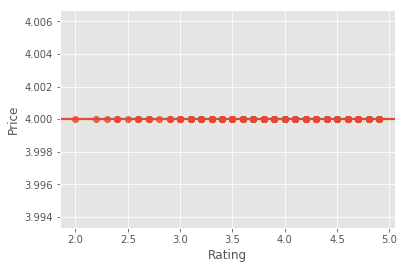

In [22]:
high_price = zom.loc[zom['Price']==zom['Price'].max(),:]
sns.regplot(x = high_price['Rating'], y=high_price['Price'])

Here, we find all restaurants with a price level of 4 and plot their ratings on the x-axis. Under our second assumption, we should see a very heavy right skew in the dots, but the graph clearly shows that these restaurants have ratings that are widely distributed; thus, our second hypothesis does not hold.

Now, let's compare the other price levels to their respective ratings.

Text(0,0.5,'Price Level (1 to 4)')

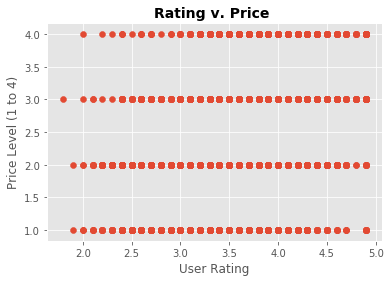

In [23]:
fig, ax = plt.subplots()
ax.scatter(zom["Rating"], zom["Price"]) 
    
ax.set_title('Rating v. Price ', loc='center', fontsize=14, fontweight = "bold") 


ax.set_xlabel("User Rating")
ax.set_ylabel("Price Level (1 to 4)")

Again, we see that price level really has no correlation with overall ratings. All price levels exhibit no skew to a low or high rating.

Text(0,0.5,'Price Level (1 to 4)')

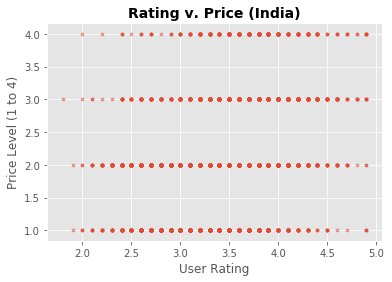

In [25]:
in_rst = zom.loc[zom['Country'] == 'India',:]

fig, ax = plt.subplots()
ax.scatter(in_rst["Rating"], in_rst["Price"], alpha= 0.50,
           s=10)  
    
ax.set_title('Rating v. Price (India)', loc='center', fontsize=14, fontweight = "bold") 


ax.set_xlabel("User Rating")
ax.set_ylabel("Price Level (1 to 4)")

Now, we look at only India's restaurants (as it has the greatest share of the sample size) to see if the same result occurs: it does. We can garner no clear correlation between the price level of the restaurant and its user rating. 

In fact, all ratings at each price level seem to concentrate between 3 and 4. This is actually an interesting phenomenon in platforms that allow consumers to leave reviews (eBay, Yelp, etc.). All factors (price, cuisine, etc.) notwithstanding, the probability a user will leave a certain rating is the same; that rating varies from platform to platform, but the pattern remains the same. 

We can plot a histogram comparing user ratings on restaurants and the number of votes that begot the rating.

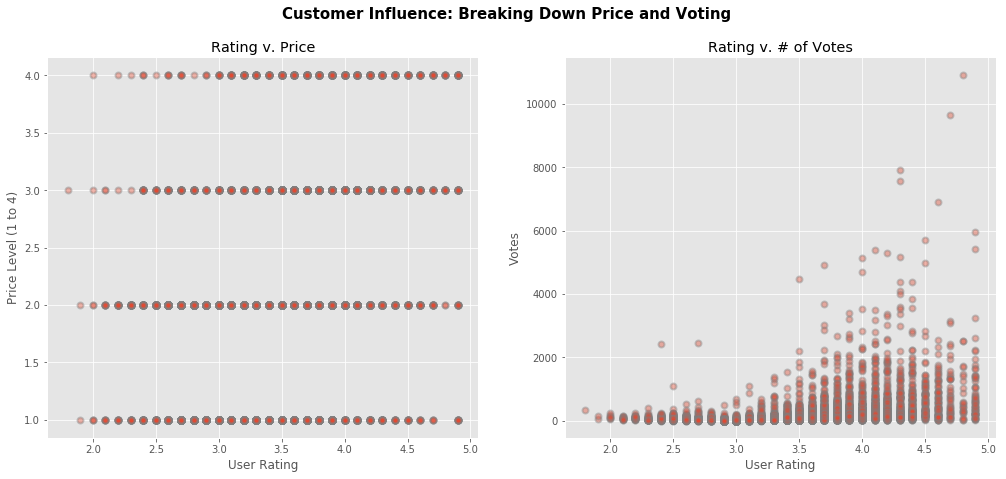

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex ="col", figsize = (17, 7))
plt.xlabel("the X axis")
plt.ylabel("the Y axis")
plt.suptitle("Customer Influence: Breaking Down Price and Voting", fontsize = 15, fontweight = "bold")

ar = np.float64(zom["Rating"])
pr = np.float64(zom["Price"])
v = np.float64(zom["Votes"])

ax1.scatter(ar, pr, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2) #add titles (main and on axis)

ax1.set_title("Rating v. Price")
ax1.set_xlabel('User Rating')
ax1.set_ylabel('Price Level (1 to 4)')

ax2.scatter(ar, v, cmap="Blues", alpha=0.4, edgecolors="grey", linewidth=2)
ax2.set_title("Rating v. # of Votes")
ax2.set_xlabel('User Rating')
ax2.set_ylabel('Votes')

plt.show()

Here we actually see that restaurants that received more than 2,000 votes tend to achieve overall ratings between 4 and 5, not 3 and 4. Below the 2,000 vote mark, it's a little hard to tell, but it's clear that restaurants with ratings less than 3.5 do not get a large number of votes. From the right graph, we can conclude that a restaurant with more than 2,000 votes is more likely to have a higher rating.

Now, we will make a histogram showing the frequency with which an individual restaurant achives a certain rating.

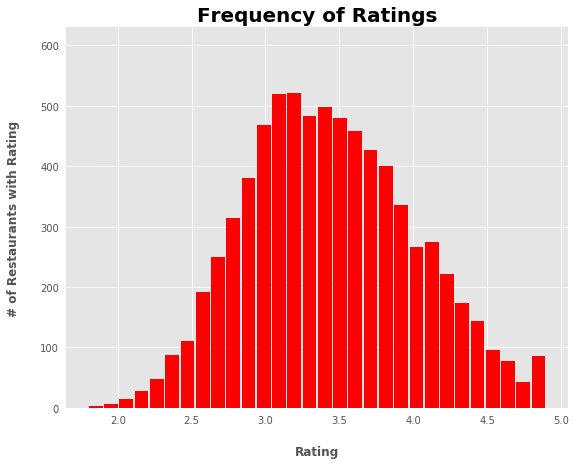

In [27]:
ax = zom.hist(column='Rating', bins=30, grid=True, figsize=(9,7), color='r', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    #despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    #switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    #draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    #set main title
    x.set_title("Frequency of Ratings", weight='bold', size=20)

    #set x-axis label
    x.set_xlabel("Rating", labelpad=20, weight='bold', size=12)

    #set y-axis label
    x.set_ylabel("# of Restaurants with Rating", labelpad=20, weight='bold', size=12)

In [28]:
zom[['Price','Rating']].corr()

,Price,Rating
Price,1.000000,0.403169
Rating,0.403169,1.000000


This is more in line with our previous observation that all ratings seemed to concentrate between a rating of 3 and 4 (more accurately, between 2.9 and 3.8). Very few restaurants received a rating below 2.50; there is definitely a skew towards the higher ratings.

Above we also explicitly calculate the correlation between price and rating, and the conclusions from our graphs match the result. There is no convincing correlation, but restaurants with a higher price probably won't have a relatively low rating.

Now we want to visualize cuisine and ratings.

Text(0,0.5,'Cuisine')

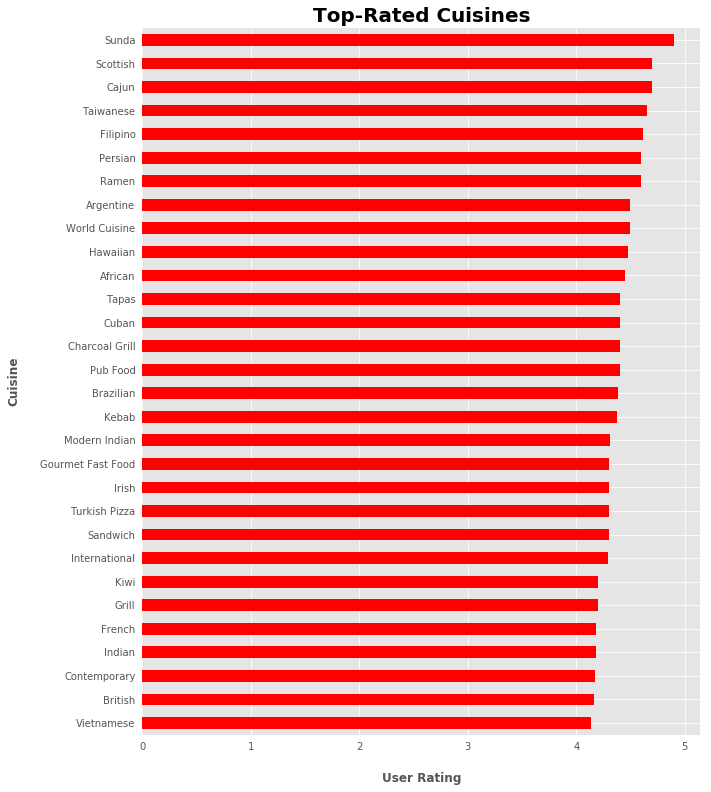

In [29]:
x1 = zom.groupby('Cuisine')['Rating'].mean().sort_values().tail(30)

ax = x1.plot(kind='barh', figsize=(10, 13), color='r', zorder=2, width=0.5)

#despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#set main title
ax.set_title("Top-Rated Cuisines", weight='bold', size=20)

#set x-axis label
ax.set_xlabel("User Rating", labelpad=20, weight='bold', size=12)
    
#set y-axis label
ax.set_ylabel("Cuisine", labelpad=20, weight='bold', size=12)

This is the shows the same information as cuisdata_r pivot table. We expanded it to show the top 30 cuisines so that we could find French cuisine, which ranks at 26th. This is quite low, as there over 100 cuisines. Again, we cannot find convincing data that the connotation of French cuisine to fine dining and good dining experiences holds true.

#### Conclusion & Next Steps
Through this project, we have conclude that cuisines that are usually considered high-dining experiences like French and Japanese are not necessarily the most expensive and are definitely not the highest-rated. Moreover, from the data set, the cuisines with highest average rating were not the most expensive. This data sample from Zomato effectively disproves our two original hypotheses that we inferred based on prior knowledge and experiences. 

We do note a few limitations in the data:
* Zomato is based in India, and this data set is highly concentrated on restaurants in the country
* India's restaurant ecosystem should not be taken as representative of the global restaurant industry
* Haute cuisines like French and Japanese may not be fully developed in the Indian market (or there may not be a big enough market for them yet)
* This data set by no mean represents the population of Zomato votes; it's merely a sample
* We did cull quite a bit of the data when cleaning it, so the sample became further constrained
* The cuisines we chose as the representative cuisine for the restaurant may not have been truly representative

To further explore this topic, we propose these next steps:
* Compare data sets from other restaurant search platforms like TripAdvisor and Yelp
* Find a representative sample for the global restaurant industry
* Further research the implicit biases and platform dynamics that occur when leaving review/ratings

Ultimately, this project is quite constrained, and the analysis performed was elementary. Further insight can be gained by expanding the data set and using more complex data analysis tools to further test relationships between restaurant qualities and ratings.

#### GitHub Link
https://github.com/ss9270/Data_Bootcamp_Final_Project